# Créer des fonctions

Nous avons déjà croisé certaines fonction, et nous avons même eu l'occasion d'en créer une dans les sections précédentes. **Revenons plus en détail sur la création d'une fonction**.

Une fonction permet de réutiliser facilement des morceaux de code et de les rendre assez modulaire pour l'adapter à différentes entrée à travers ses *arguments*.

Prenons un premier exemple, où il s'agira de convertir des température de Fahrenheit en Celsius.

In [2]:
def fahr_to_celsius(temp_fahr):
    temp_celsius = ((temp_fahr - 32) * (5 / 9))
    return temp_celsius
print("out of function")

out of function


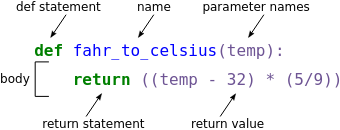

La définition de la fonction commence par `def` suivi du nom de la fonction `fahr_to_celsius` puis d'une liste d'arguments entre parenthèse. Le corps de la fonction est indenté et s'arrête avec un `return` et la fin de l'indentation.

A l'appel de la fonction, les valeurs qui lui sont passé son assigné à ces variables (ici `temp`) et peuvent être utilisé *localement*. Si l'on essaye d'accéder à `temp` en dehors de la fonction, Python renvera une erreur. On parle de *scope local* et de *score global*.

Dans la fonction on utilise `return` pour récupérer le résultat à l'appel de la fonction.

Essayons notre fonction :

In [3]:
print('freezing point of water:', fahr_to_celsius(32), 'C')
print('boiling point of water:', fahr_to_celsius(212), 'C')

freezing point of water: 0.0 C
boiling point of water: 100.0 C


Elle s'appelle comme toutes les autres fonction, et nous avons successivement affiché la valeur qu'elle retourne.

## Composition de fonction

Maintenant que l'on a une fonction capable de transformer les °F en °C, écrivons de quoi transformer les °C en K.

In [4]:
def celsius_to_kelvin(temp_c):
    return temp_c + 273.15

print('freezing point of water in Kelvin:', celsius_to_kelvin(0.))

freezing point of water in Kelvin: 273.15


Et pour convertir de °F en K? Il serait possible d'écrire la formule complète, mais ce n'est pas nécessaire. A la place nous allons composer les deux fonctions précédentes.

In [5]:
def fahr_to_kelvin(temp_f):
    temp_c = fahr_to_celsius(temp_f)
    temp_k = celsius_to_kelvin(temp_c)
    return temp_k

print('boiling point of water in Kelvin:', fahr_to_kelvin(212.0))

boiling point of water in Kelvin: 373.15


C'est de cette façon qu'on construit les programmes les plus larges et les plus complexes : les opérations les plus basiques sont défini en premier lieu et les opérations plus complexes proviennent de la combinaison de ces fonctions simples.

Les fonctions n'ont pas de tailles limites, elles peuvent faire quelques lignes ou plusieurs dizaine de ligne, mais ne devraient jamais être trop complexes : une règle approximative est qu'une fonction ne devrait pas dépasser la taille d'un écran de beaucoup.

## Application à nos données

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
data = np.loadtxt("../../data/CO2_np.csv", delimiter=",")
days, minutes = map(np.arange, data.shape) # map prend une fonction et un itérable et va appliquer la fonction à chaque éléments de l'itérable
hours = minutes / 60
# np.arange est l'equivalent a linspace sous MATLAB

In [8]:
def detect_overload(CO2, high_threshold):
    return CO2 >= high_threshold

def detect_underload(CO2, low_threshold):
    return CO2 <= low_threshold

def detect_out_range(CO2, high_threshold, low_threshold): # return TRUE if one of the threshold is crossed
    return detect_overload(CO2, high_threshold) | detect_underload(CO2, low_threshold)

def plot_out_of_range(days, hours, array_CO2, ax=None):
    if ax is None: # why ?
        fig, ax = plt.subplots()
    under = array_CO2.min()
    over = array_CO2.max()
    out_of_range = detect_out_range(data, low_threshold=under, high_threshold=over)
    pcm = ax.pcolormesh(days, hours, out_of_range)
    ax.set_xlabel("hour")
    ax.set_ylabel("day of month")
    return ax

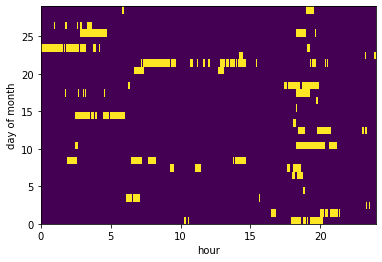

In [9]:
plot_out_of_range(hours, days, data)

### Tester et documenter

In [10]:
def offset_mean(data, target_mean_value):
    return (data - np.mean(data)) + target_mean_value

In [11]:
z = np.zeros((2, 2))
print(z)
print(offset_mean(z, 3))

[[0. 0.]
 [0. 0.]]
[[3. 3.]
 [3. 3.]]


In [12]:
data = np.loadtxt("../../data/CO2_np.csv", delimiter=",")
print(offset_mean(data, 0)) # ecart à la moyenne de chaque valeur

[[-348.84965278 -348.84965278 -348.84965278 ...  -18.84965278
   -28.84965278  -58.84965278]
 [ -38.84965278  -38.84965278  -28.84965278 ... -458.84965278
  -428.84965278 -473.84965278]
 [-438.84965278 -468.84965278 -473.84965278 ... -461.26344588
  -461.60827347 -461.95310105]
 ...
 [ 241.15034722  241.15034722  241.15034722 ...  236.15034722
   231.15034722  121.15034722]
 [ 156.15034722  561.15034722  691.15034722 ...  371.15034722
   311.15034722  301.15034722]
 [ 341.15034722  291.15034722  376.15034722 ... 1401.15034722
  1461.15034722 1441.15034722]]


On peut vérifier certaines métriques pour se rassurer sur l'action de la fonction

In [15]:
print(f"original min, mean, and max are: {np.min(data):g}, {np.mean(data):g}, {np.max(data):g}")
offset_data = offset_mean(data, 0)
print(f"min, mean, and max of offset data are: {np.min(offset_data):g}, {np.mean(offset_data):g}, {np.max(offset_data):g}")
# :g = permet d'exprimer les valeurs en format scientifique e-/+ exposant

original min, mean, and max are: 390, 918.85, 2550
min, mean, and max of offset data are: -528.85, -8.01703e-14, 1631.15


Un autre élément à vérifier est que la std soit conservé dans l'opération

In [16]:
print(f"difference in standard deviations before and after: {np.std(data) - np.std(offset_data):g}")

difference in standard deviations before and after: 0


Une autre tache nous attend : documenter la fonction pour se rappeler son fonctionnement plus tard.

Une première façon de faire est d'ajouter des commentaires au dessus de la fonction :

In [17]:
# offset_mean(data, target_mean_value):
# return a new array containing the original data with its mean offset to match the desired value.
def offset_mean(data, target_mean_value):
    return (data - numpy.mean(data)) + target_mean_value

In [18]:
help(offset_mean)

Help on function offset_mean in module __main__:

offset_mean(data, target_mean_value)
    # offset_mean(data, target_mean_value):
    # return a new array containing the original data with its mean offset to match the desired value.



Il existe une meilleur façon de faire : utiliser une *docstring*. Si le premier élément de la fonction est une chaine de caractère qui n'est pas assigné à une variable, elle sera attaché à la fonction comme documentation.

In [19]:
def offset_mean(data, target_mean_value):
    """Return a new array containing the original data
       with its mean offset to match the desired value."""
    return (data - np.mean(data)) + target_mean_value

Il est maintenant possible d'interroger Python pour afficher la documentation de la fonction.

In [20]:
help(offset_mean)

Help on function offset_mean in module __main__:

offset_mean(data, target_mean_value)
    Return a new array containing the original data
    with its mean offset to match the desired value.



In [21]:
def offset_mean(data, target_mean_value):
    """Return a new array containing the original data
       with its mean offset to match the desired value.

    Arguments
    ---------
    data: np.ndarray
        the data that will be used to perform the offset
    target_mean_value: float
        the targeted mean value

    Examples
    --------
    >>> offset_mean([1, 2, 3], 0)
    array([-1.,  0.,  1.])
    """
    return (data - np.mean(data)) + target_mean_value

help(offset_mean)

Help on function offset_mean in module __main__:

offset_mean(data, target_mean_value)
    Return a new array containing the original data
       with its mean offset to match the desired value.
    
    Arguments
    ---------
    data: np.ndarray
        the data that will be used to perform the offset
    target_mean_value: float
        the targeted mean value
    
    Examples
    --------
    >>> offset_mean([1, 2, 3], 0)
    array([-1.,  0.,  1.])



## Définir des arguments avec défauts

Il existe deux types d'arguments, les arguments *positionnels* et les arguments *nommés*. Les premiers sont obligatoirement fournis à l'appel de la fonction alors que les second possèdent une valeur optionnelle et peuvent être omis à l'usage.

L'utilisateur peut dans les deux cas fournir les arguments sans spécifier leur nom: `func(5, 3)`. Dans ce cas, les arguments doivent suivre le même ordre que défini dans la *signature* (nom de la fonction + arguments) de la fonction. Il est possible de fournir l'argument avec son nom : `func(arg1=5, arg2=3)`. Dans ce cas, l'ordre n'a pas besoin d'être suivi. Il est possible de mixer les deux formalisme, mais **il faut toujours fournir les arguments positionnels avant les arguments nommés**. Cette règle vaut à la définition ET à l'usage de la fonction.

`func(5, arg2=3)` est valable, mais `func(arg1=5, 3)` ne fonctionnera pas.

Certaines fonctions imposent que les arguments soient nommés.

```python
def my_func(arg1, arg2, kwarg1=0, *, kwarg2=0, kwarg3=5):
    pass
```

Tout ce qui est après l'opérateur `*` sera obligatoirement nommés: `my_func(5, 3, 0, 8)` ne marchera pas, `my_func(5, 3, 0, kwarg2=8)` fonctionnera.

In [22]:
def offset_mean(data, *, target_mean_value=0):
    """Return a new array containing the original data
       with its mean offset to match the desired value.

    Arguments
    ---------
    data: np.ndarray
        the data that will be used to perform the offset
    target_mean_value (default 0): float
        the targeted mean value

    Examples
    --------
    >>> offset_mean([1, 2, 3], 0)
    array([-1.,  0.,  1.])
    """
    return (data - np.mean(data)) + target_mean_value

help(offset_mean)

Help on function offset_mean in module __main__:

offset_mean(data, *, target_mean_value=0)
    Return a new array containing the original data
       with its mean offset to match the desired value.
    
    Arguments
    ---------
    data: np.ndarray
        the data that will be used to perform the offset
    target_mean_value (default 0): float
        the targeted mean value
    
    Examples
    --------
    >>> offset_mean([1, 2, 3], 0)
    array([-1.,  0.,  1.])



In [26]:
print(offset_mean(data).mean())
print(offset_mean(data, target_mean_value=-3).mean())
print(offset_mean(data, 5).mean())

-8.017027371183589e-14
-3.0000000000000844


TypeError: offset_mean() takes 1 positional argument but 2 were given

## Aller plus loin

### Scope et fonction *pures*

Il est possible d'accéder à des variables qui sont en dehors du scope de la fonction:

In [27]:
a = 5

def add_a_to_arg(arg):
    return arg + a

In [29]:
a = 5
add_a_to_arg(15)

20

`a` fait partie du scope *global*, `arg` du scope *local*. Cette dernière variable sera inaccessible hors de la fonction

In [30]:
arg

NameError: name 'arg' is not defined

Réassigner une variable *non-local* n'est pas possible : elles ne sont accessible qu'en lecture, a moins d'utiliser le statement `global`

In [31]:
a = 5

def add_a_to_arg(arg):
    a = a + arg
    return a

add_a_to_arg(7)

UnboundLocalError: local variable 'a' referenced before assignment

In [32]:
a = 5

def add_a_to_arg(arg):
    global a
    a = a + arg
    return a

print(a)
print(add_a_to_arg(7))
print(a)

5
12
12


Si c'est possible, **ce n'est pas une bonne pratique** et peut mener à des bugs importants. Accéder à une variable non-local dans une fonction, c'est s'exposer à un bug si cette variable est modifié plus tard

In [33]:
a = 5

def add_a_to_arg(arg):
    return a + arg

print(add_a_to_arg(7))
a = None
print(add_a_to_arg(7))

12


TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'

C'est encore pire en modifiant une variable non-locale. Il est conseillé d'utiliser, autant que possible, des fonctions dites **pures**. Ce sont des fonctions qui ne modifient aucune variable hors de leur scope et qui ne dépendent que de leurs arguments.

### opérateur splat (et double splat)

Il est possible d'écrire des fonctions avec des arguments variables avec l'opérateur splat, avec la signature

In [34]:
def my_func(*args, **kwargs):
    print(args)
    print(kwargs)

In [46]:
my_func(5, 6, (10,1), test="test", an_arg=[7], another_arg="test")

(5, 6, (10, 1))
{'test': 'test', 'an_arg': [7], 'another_arg': 'test'}


L'opération inverse est possible, et appeler `my_func(*my_list)` va faire passer une collction d'arguments en tant qu'arguments positionnels tandis que `my_func(**my_dict)` va passer un mapping d'arguments en tant qu'arguments nommés à une fonction.

[***Prochaine section***](fonda_09-robustesse_erreur_debug.ipynb)